# Importación de liberías

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Carga de dataframes y analisis exploratorio

In [418]:
ds_ab = pd.read_csv(r'Inputs\dataset_alpha_betha.csv',sep=',')
ds_demand = pd.read_csv(r'Inputs\dataset_demand_acumulate.csv',sep=',')
ds_predict = pd.read_csv(r'Inputs\to_predict.csv',sep=',')

In [419]:
print(ds_ab.head()) #
print(ds_demand.head())
print(ds_predict.head())

       autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              Yes           Electronic che

In [420]:
ds_ab.head()

,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Alpha
1,5575-GNVDE,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,Alpha
2,3668-QPYBK,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Betha
3,7795-CFOCW,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Alpha
4,9237-HQITU,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Betha


In [421]:
ds_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   autoID            7043 non-null   object 
 1   SeniorCity        7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Service1          7043 non-null   object 
 5   Service2          7043 non-null   object 
 6   Security          7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  Charges           7043 non-null   float64
 14  Demand            7043 non-null   object 
 15  Class             7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [422]:
ds_ab.apply(pd.Series.unique)

autoID              [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
SeniorCity                                                     [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
Service1                                                    [No, Yes]
Service2                                  [No phone service, No, Yes]
Security                               [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
Contract                         [Month-to-month, One year, Two year]
PaperlessBilling                                            [Yes, No]
PaymentMethod       [Electronic check, Mailed check, Bank transfer...
Charges             [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...
Demand              

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

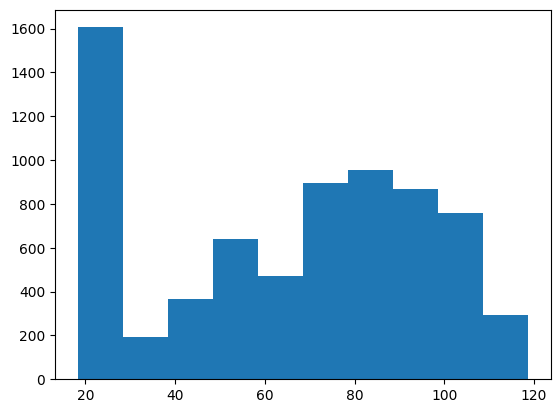

In [423]:
plt.hist(ds_ab['Charges'])

(array([799., 742., 721., 708., 715., 696., 674., 670., 659., 659.]),
 array([   0.,  653., 1306., 1959., 2612., 3265., 3918., 4571., 5224.,
        5877., 6530.]),
 <BarContainer object of 10 artists>)

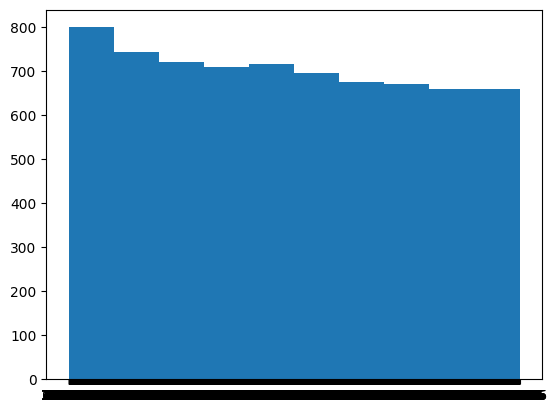

In [424]:
plt.hist(ds_ab['Demand'])

In [425]:
ds_ab.describe()

,SeniorCity,Charges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


In [426]:
ds_ab_heatmap = ds_ab.copy()
ds_ab_heatmap.drop(columns='autoID',axis=1,inplace=True)

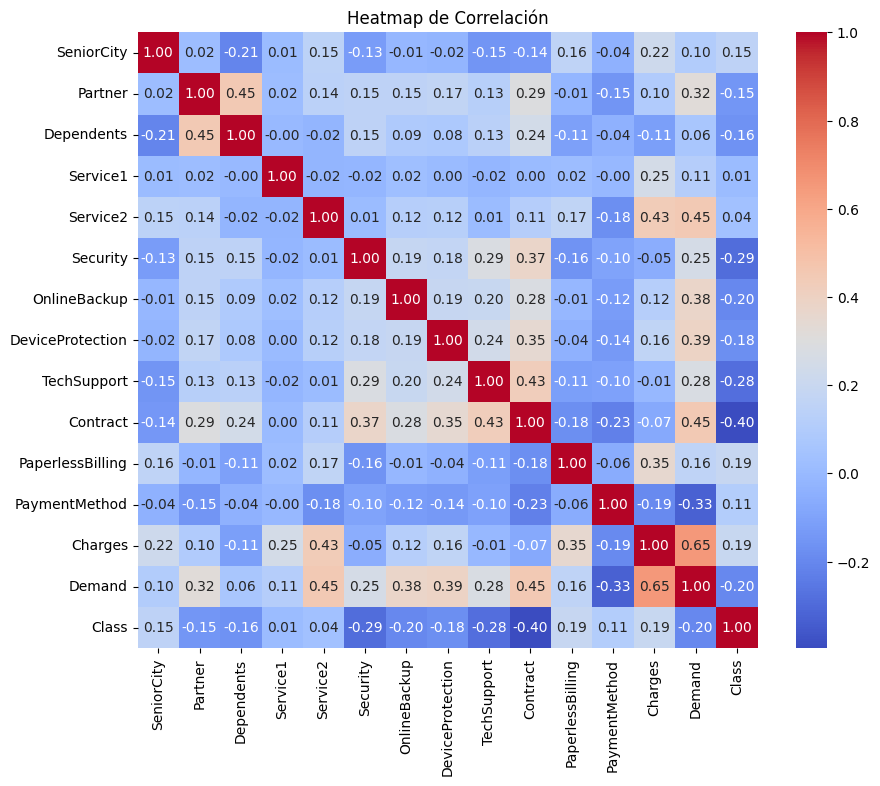

In [427]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Convertir columnas categóricas a números
categorical_columns = ['Partner', 'Dependents', 'Service1', 'Service2', 'Security', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Class']

for col in categorical_columns:
    ds_ab_heatmap[col] = le.fit_transform(ds_ab_heatmap[col])
    
# Reemplazar las cadenas vacías con NaN
ds_ab_heatmap.replace(' ', np.nan, inplace=True)

#Crear la matriz de correlación de las columnas numéricas
# Seleccionamos solo las columnas numéricas para el heatmap
corr_matrix = ds_ab_heatmap.corr()

# Paso 3: Crear el Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.title('Heatmap de Correlación')
plt.show()

# *1. Predicción de demanda*

In [446]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [429]:
# Trabajar con los datos
ds_demand_base = ds_demand.copy()
# Convertir la columna 'year_month' a un índice datetime
ds_demand_base['year_month'] = pd.to_datetime(ds_demand_base['year_month'], format='%Y-%m')
ds_demand_base.set_index('year_month', inplace=True)
ds_demand_base

,Demand
year_month,
2017-01-01,1211.009490
2017-02-01,1660.584649
2017-03-01,3182.587014
2017-04-01,3506.515270
2017-05-01,4554.082280
...,...
2021-12-01,3006.311107
2022-01-01,217.314949
2022-02-01,332.062614


# Visualizaciones (para concoer el tema de estacionalidad)

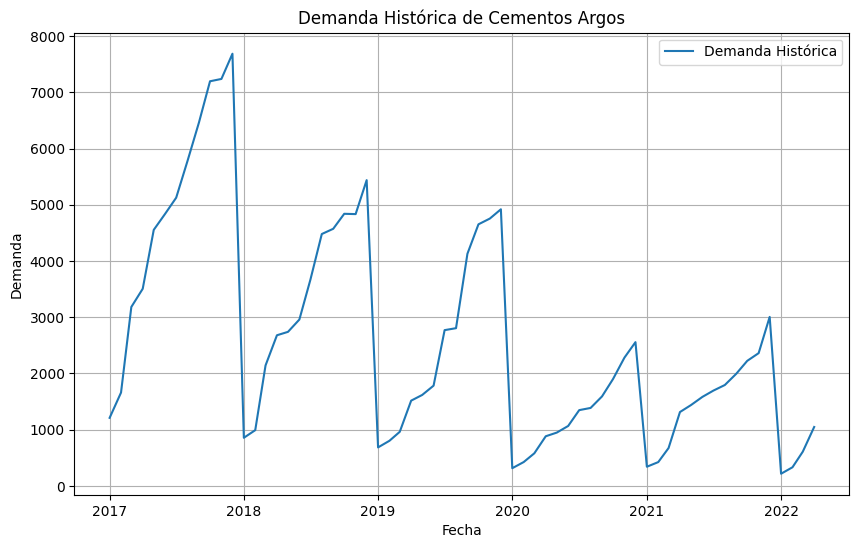

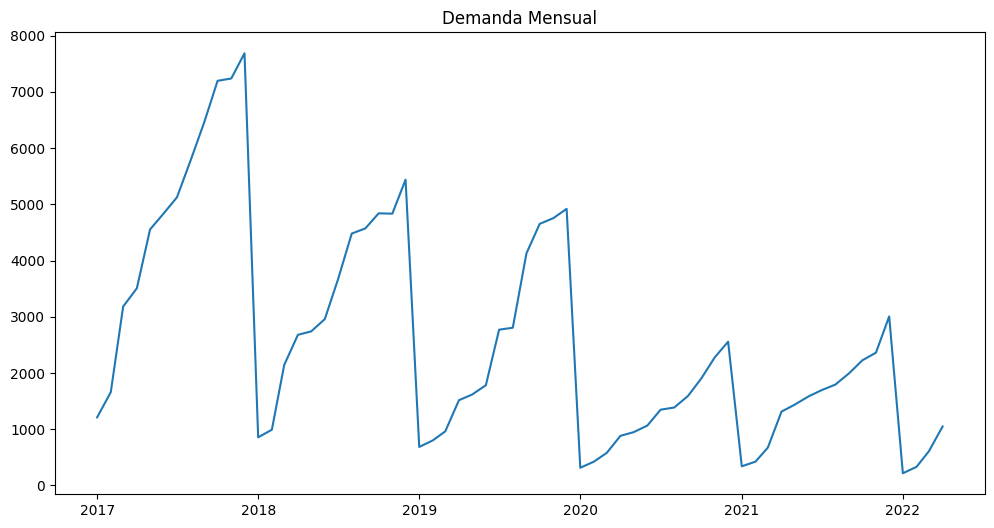

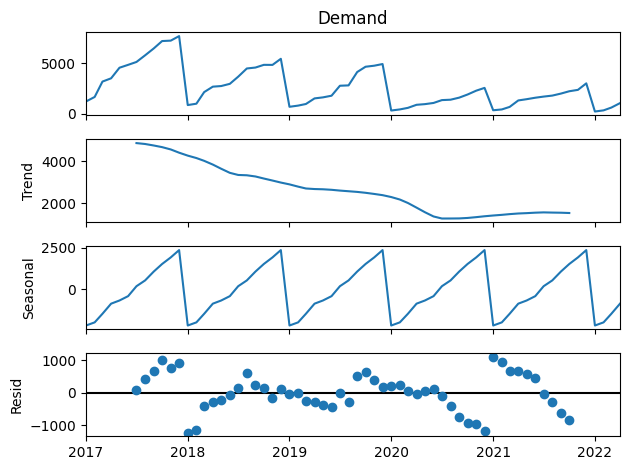

In [430]:
# Demanda histórica
plt.figure(figsize=(10, 6))
plt.plot(ds_demand_base.index, ds_demand_base['Demand'], label='Demanda Histórica')
plt.title('Demanda Histórica de Cementos Argos')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.show()

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(ds_demand_base['Demand'])
plt.title('Demanda Mensual')
plt.show()

# Descomposición de la serie (ejemplo)
decomposition = seasonal_decompose(ds_demand_base['Demand'], model='additive')
decomposition.plot()
plt.show()

# Entrenamiento del modelo

Se utiliza SARIMA por el tema de estacionalidades

In [432]:
# Ajustar el modelo SARIMA (ejemplo)
model = SARIMAX(ds_demand_base['Demand'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer predicciones
future_dates = pd.date_range(start='2022-05-01', end='2022-07-01', freq='MS')
future_df = pd.DataFrame(index=future_dates, columns=ds_demand_base.columns)
forecast = results.forecast(steps=3)
future_df['Demand'] = forecast

c:\Users\jisaza53\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jisaza53\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jisaza53\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jisaza53\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

# Grafica con predicción

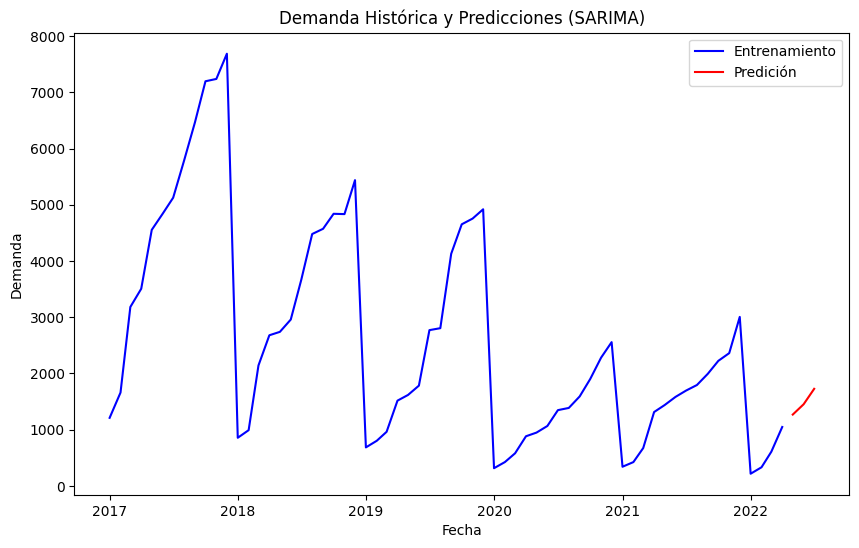

In [ ]:
# Graficar los datos históricos (Entrenamiento) y las predicciones (Prueba) en la misma gráfica
plt.figure(figsize=(10, 6))
plt.plot(ds_demand_base.index, ds_demand_base['Demand'], label='Entrenamiento', color='blue')  # Datos históricos
plt.plot(future_df.index, future_df['Demand'], label='Predición', color='red')  # Predicciones

# Añadir etiquetas y leyenda
plt.title('Demanda Histórica y Predicciones (SARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()

# Evaluación del modelo

In [458]:
# Prueba de estacionariedad (ejemplo)
result = adfuller(ds_demand_base['Demand'])

# Evaluar el modelo
y_true = ds_demand_base['Demand'][-3:]  # Últimos 3 valores reales

# Access the predicted values from the forecast object
predicted_values = forecast.values

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true, predicted_values))
mae = mean_absolute_error(y_true, predicted_values)
mape = np.mean(np.abs((y_true - predicted_values) / y_true)) * 100

print("RMSE (Root Mean Squared Error - Error Cuadrático Medio Raíz):", rmse)
print("MAE (Mean Absolute Error - Error Absoluto Medio):", mae)
print("MAPE (Mean Absolute Percentage Error - Error Absoluto Porcentual Medio):", mape)

print('ADF Statistic (Estadística de la prueba ADF - Augmented Dickey-Fuller Test): %f' % result[0])
print('p-value (Valor p del test ADF): %f' % result[1])

RMSE (Root Mean Squared Error - Error Cuadrático Medio Raíz): 826.8175995910296
MAE (Mean Absolute Error - Error Absoluto Medio): 819.8773069200448
MAPE (Mean Absolute Percentage Error - Error Absoluto Porcentual Medio): 161.82739434154084
ADF Statistic (Estadística de la prueba ADF - Augmented Dickey-Fuller Test): -4.441016
p-value (Valor p del test ADF): 0.000251


In [447]:
final_df

,Demand
2017-01-01,1211.009490
2017-02-01,1660.584649
2017-03-01,3182.587014
2017-04-01,3506.515270
2017-05-01,4554.082280
...,...
2022-03-01,609.119726
2022-04-01,1048.486287
2022-05-01,1269.200235
2022-06-01,1453.012693
